# Importing and installing required libraries

In [18]:
import pandas as pd
from datetime import datetime
from matplotlib import pyplot
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Question 1

(8 pts) The Bureau of Transportation Statistics (BTS) conducted a study to evaluate the impact of Sept 11 attacks (9/11) on U.S. air transportation. The purpose of this study is to provide a greater understanding of the passenger travel behavior patterns of persons travelling by air before and after the event. In order to assess the impact of September 11, BTS took the following approach: Using data before September 11, it forecasted future data (under the assumption of no terrorist attack). Then, BTS compared the forecasted series with the actual data to assess the impact of the event. 


## Importing, examining and cleaning the BTS Dataset

In [2]:
# importing the dataset

df_bts = pd.read_csv("BTS_Air_Rail_Vehicle_Miles.csv")
df_bts

,Month,Air,Rail,Vehicle
0,Jan-90,35153577,454115779,163.28
1,Feb-90,32965187,435086002,153.25
2,Mar-90,39993913,568289732,178.42
3,Apr-90,37981886,568101697,178.68
4,May-90,38419672,539628385,188.88
...,...,...,...,...
167,Dec-03,57795908,489403554,237.60
168,Jan-04,53447972,410338691,217.30
169,Feb-04,52608801,389778365,210.40
170,Mar-04,63600019,453014590,247.50


In [3]:
# data types

df_bts.dtypes

Month       object
Air          int64
Rail         int64
Vehicle    float64
dtype: object

In [4]:
df_bts.dtypes

Month       object
Air          int64
Rail         int64
Vehicle    float64
dtype: object

In [5]:
df_bts.columns

Index(['Month', 'Air ', 'Rail', 'Vehicle'], dtype='object')

## Part a 

Is the goal of this study descriptive or predictive?	

Although, there is is some aspect of the study involving forecasting, the ultimate goal is descriptive analysis. The problem involves forecasting travel behaviours post 9/11 first. Then these values are ccompared to the ground truth values. This involves descriptive analysis. Hence, the goal of the study is largely descriptive. 

## Part b

Create a time series plot of the Air data, i.e. a plot yt versus t, where t=1,2,3 … What would t=1, 2, 3 refer to in the time series? Which time period does t=1 refer to? 

In [6]:
df_bts_air = df_bts[['Month', 'Air ']]
df_bts_air.set_index('Month', inplace=True)
df_bts_air

,Air
Month,
Jan-90,35153577
Feb-90,32965187
Mar-90,39993913
Apr-90,37981886
May-90,38419672
...,...
Dec-03,57795908
Jan-04,53447972
Feb-04,52608801


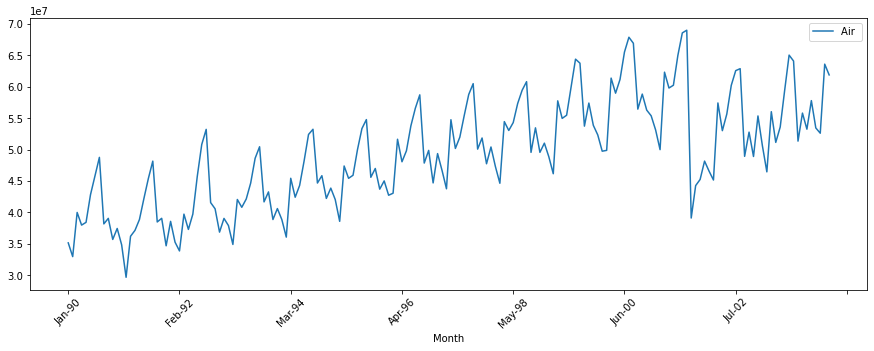

In [7]:
plt.rcParams["figure.figsize"] = (15,5)
df_bts_air.plot()
plt.xticks(rotation = 45)
plt.show()

t = 1, 2, 3, ... represent to the month, year in the time series. t = 1 refers to the month of January in the year 1990.

## Part c

What are the values for y1, y2 and y3 in the time series?

y1 = 35153577

y2 = 32965187 

y3 = 39993913



# Question 2

(10 pts) In addition to air travel data, two additional time series are also provided in the same data file – Rail and Vehicle travel.

## Part a

Which of these components appear in the Air and Vehicle time series: i) Level; ii) Seasonality; iii) Trend; iv) Noise. List for each data set. 	

### Components of the air time series

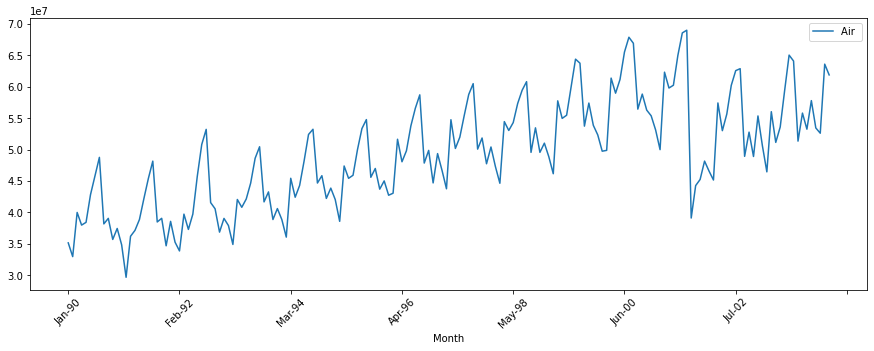

In [8]:
df_bts_air = df_bts[['Month', 'Air ']]
df_bts_air.set_index('Month', inplace=True)
plt.rcParams["figure.figsize"] = (15,5)
df_bts_air.plot()
plt.xticks(rotation = 45)
plt.show()

Components appearing in the air time series:

1. Level
2. Seasonality
3. Trend
4. Noise

### Components of the vehicle time series

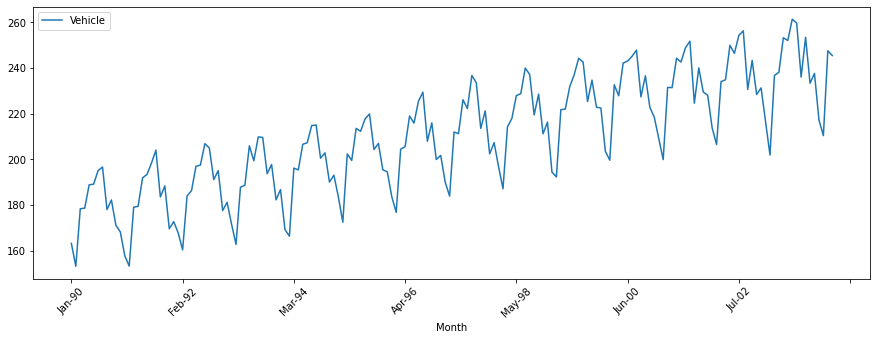

In [10]:
df_bts_vehicle = df_bts[['Month', 'Vehicle']]
df_bts_vehicle.set_index('Month', inplace=True)
plt.rcParams["figure.figsize"] = (15,5)
df_bts_vehicle.plot()
plt.xticks(rotation = 45)
plt.show()

Components appearing in the vehicle time series:

1. Level
2. Seasonality
3. Trend


## Part b

For the Rail data set, describe the trend, i.e. how does the trend vary across the time series? 	

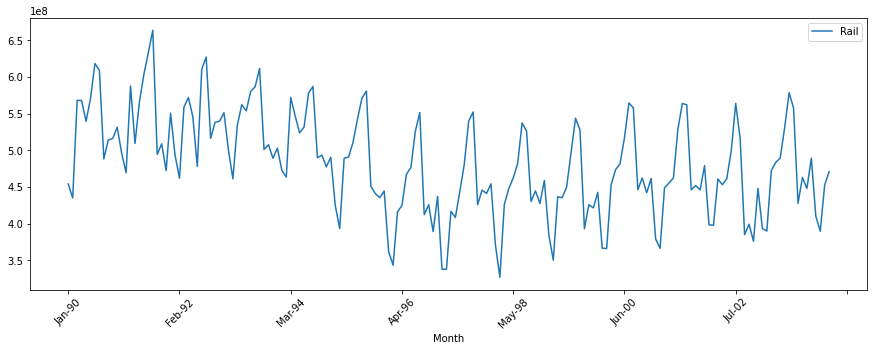

In [42]:
df_bts_air = df_bts[['Month', 'Rail']]
df_bts_air.set_index('Month', inplace=True)
plt.rcParams["figure.figsize"] = (15,5)
df_bts_air.plot()
plt.xticks(rotation = 45)
plt.show()

In the rail dataset, the trend does not remain constant accross the entire time series. There is a clearly observable downward trenduntil 1998-05. After that, there is a noticeable upward trend.

# Question 3

(6 pts) Forecasting Shampoo Sales: The file ShampooSales.csv contains data on the monthly
sales of a certain shampoo over a 3 year period.


### Importing, examining and cleaning the shampoo sales dataset

In [46]:
# Importing the dataset

df_shampoosales = pd.read_csv('ShampooSales.csv')
df_shampoosales

,Month,Shampoo Sales
0,Jan-95,266.0
1,Feb-95,145.9
2,Mar-95,183.1
3,Apr-95,119.3
4,May-95,180.3
5,Jun-95,168.5
6,Jul-95,231.8
7,Aug-95,224.5
8,Sep-95,192.8
9,Oct-95,122.9


In [47]:
# data types

df_shampoosales.dtypes

Month             object
Shampoo Sales    float64
dtype: object

In [48]:
df_shampoosales.dtypes

Month             object
Shampoo Sales    float64
dtype: object

## Part a

Create a time series plot of the data. Label the axes. 	

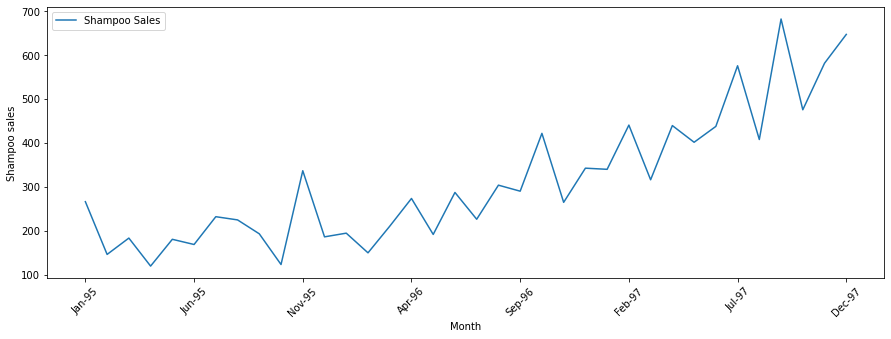

In [49]:
df_shampoosales.set_index('Month', inplace=True)
plt.rcParams["figure.figsize"] = (15,5)
df_shampoosales.plot()
plt.ylabel('Shampoo sales')
plt.xticks(rotation = 45)
plt.show()

## Part b

Which of the four components (level, trend, seasonality, noise) are present in this
series?


Components appearing in the shampoo sales time series:

1. Level
2. Trend
3. Noise

# Question 4

(6 pts) The file, Beverages_Shipment_2020.csv, contains the US beverage product shipments data. 


### Importing, examining and cleaning the shampoo sales dataset

In [15]:
# Import beverages dataset

df_beverages_shipment = pd.read_csv('Beverages_Shipment_2020.csv')
df_beverages_shipment

,Month,Dollars (in Millions)
0,Jan-92,3519
1,Feb-92,3803
2,Mar-92,4332
3,Apr-92,4251
4,May-92,4661
...,...,...
175,Aug-06,7039
176,Sep-06,6440
177,Oct-06,6446
178,Nov-06,6717


In [16]:
# data types

df_beverages_shipment.dtypes

Month                    object
Dollars (in Millions)     int64
dtype: object

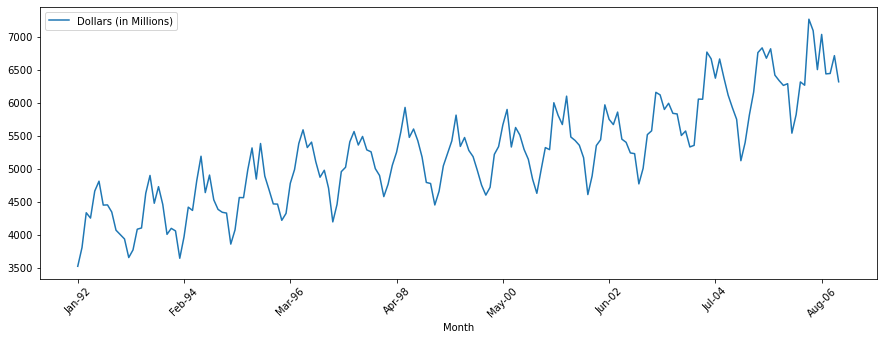

In [17]:
# Create a time series plot

df_beverages_shipment.set_index('Month', inplace=True)
plt.rcParams["figure.figsize"] = (15,5)
df_beverages_shipment.plot()
plt.xticks(rotation = 45)
plt.show()

## Part a 

Is there seasonality in this time series?		

Yes, there is seasonality in the time series. 

## Part b

Find the sample autocorrelation function for this data set. 			(2 pts)
(For Python, you can use the “plot_acf” function in “statmodels” module. Plot at least 25-30 lags)


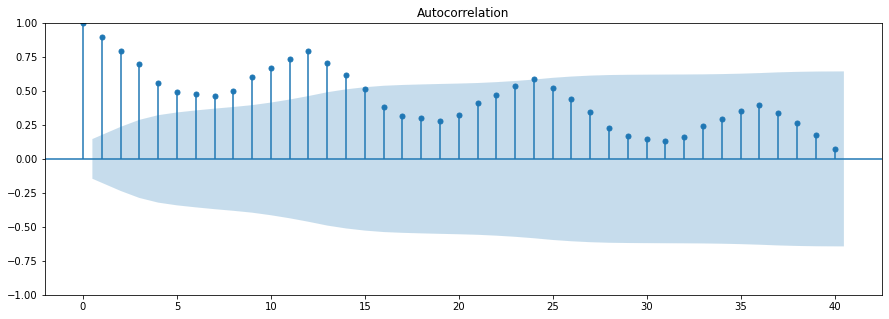

In [19]:
sm.graphics.tsa.plot_acf(df_beverages_shipment['Dollars (in Millions)'].squeeze(), lags=40)
plt.show()

## Part c

From the autocorrelation plot in (b), what is the seasonal period? 

The seasonal period is 12 months ie it is an annual seasonal trend. It can be observed from the ACF plot that the high peaks are at 12, 24, and so on which indicates a high correlation between the values at these lags. 

# Question 5

(10 pts) Data on US coal production is given in Coal_Production_US_2020.csv. 

### Importing, examining and cleaning the coal production dataset



In [22]:
# Import the coal production datatset

df_coal_production = pd.read_csv('Coal_Production_US_2020.csv')
df_coal_production

,Year,"Coal Production, Short Tons in Thousands"
0,1949,480570
1,1950,560388
2,1951,576335
3,1952,507424
4,1953,488239
5,1954,420789
6,1955,490838
7,1956,529774
8,1957,518042
9,1958,431617


In [23]:
# data types

df_coal_production.dtypes

Year                                        int64
Coal Production, Short Tons in Thousands    int64
dtype: object

## Part a

Plot the coal production data and the sample autocorrelation function.

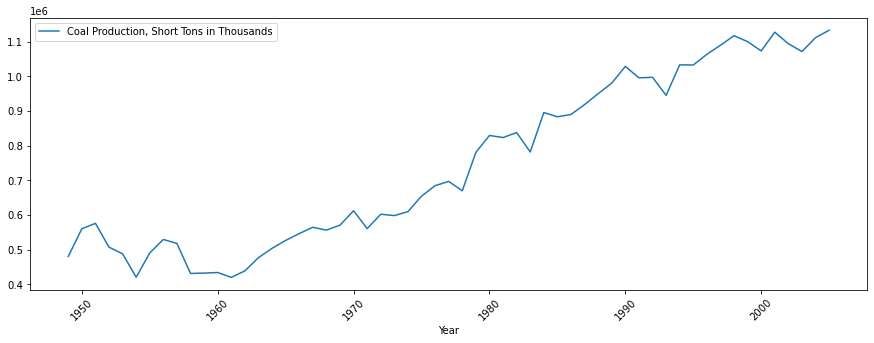

In [25]:
# Create a time series plot

df_coal_production.set_index('Year', inplace=True)
plt.rcParams["figure.figsize"] = (15,5)
df_coal_production.plot()
plt.xticks(rotation = 45)
plt.show()

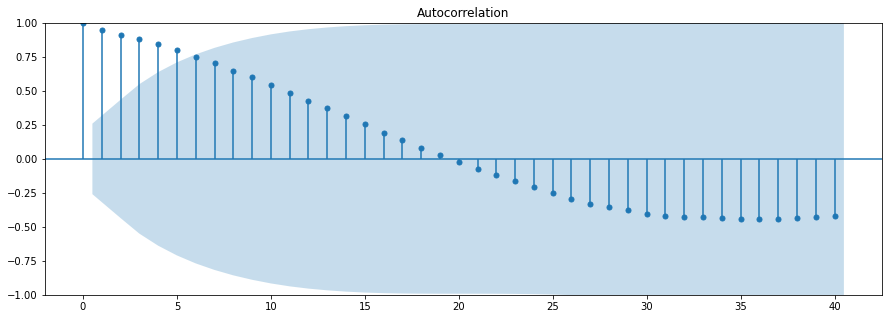

In [27]:
# autocorrealtion function plot

sm.graphics.tsa.plot_acf(df_coal_production['Coal Production, Short Tons in Thousands'].squeeze(), lags=40)
plt.show()

## Part b

Is the time series stationary or non-stationary ? 		

It can be observed from the time series plot that the time series is non-stationary due to the fact that it does not oscillate around a constant mean. However, it can be ascertained further from the ACF plot. There is a gradual decay in the values and the correlation tapers off slowly as the lags increase. This indicates that the time series is non-stationary.

## Part c

Plot the first difference of the time series and the sample autocorrelation function of the first difference. 

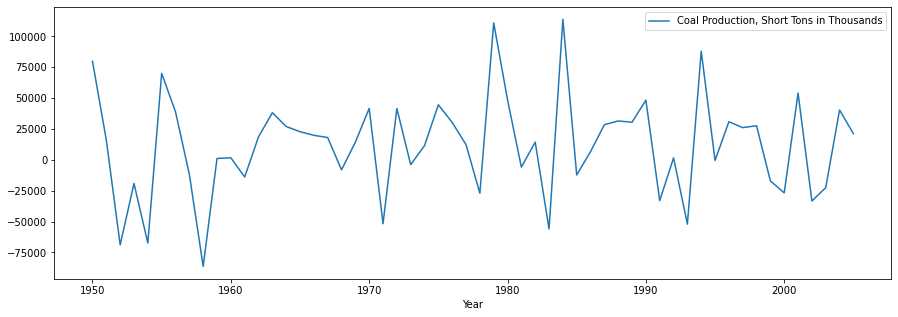

In [33]:
# plotting 1st order difference

ts_diff = df_coal_production.diff()
ts_diff.plot()
plt.show()

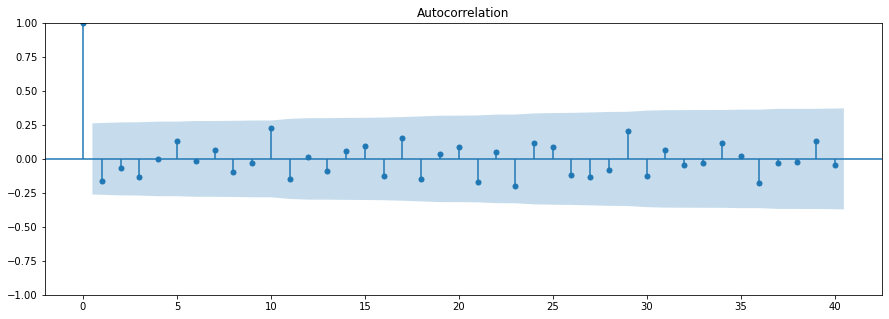

In [38]:
# autocorrealtion function plot of first difference

sm.graphics.tsa.plot_acf(ts_diff[1:].squeeze(), lags=40)
plt.show()

## Part d

What impact has differencing had on the time series? Comment with respect to presence or absence of stationarity	

There is stationarity in the time series after differencing. This is evident from the sharp drops and peaks in the ACF plot instead of a gradual decay.